# Análisis de clientes

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importando datos
url = "C:/Users/USUARIO/Desktop/Proyectos/Sistema_recomendacion/data/raw/data_raw.csv"
data = pd.read_csv(url, sep=',', encoding='latin1')

1. Perfilar a los clientes en función de su frecuencia de compra: Cálcular la frecuencia de compra de cada cliente.

In [24]:
frecuencia_compra = data.groupby("Customer ID")["Order ID"].count().reset_index()
frecuencia_compra.columns = ["CustomerID", "Frequency"]
frecuencia_compra = frecuencia_compra.sort_values(by="Frequency", ascending=False)
print(frecuencia_compra)

     CustomerID  Frequency
1206   PO-18850         97
150    BE-11335         94
733    JG-15805         90
1459   SW-20755         89
1099   MY-18295         85
...         ...        ...
1260    RC-9825          1
431     DK-2985          1
1017    MG-7890          1
1001    ME-8010          1
1586   ZC-11910          1

[1590 rows x 2 columns]


2. ¿Los clientes frecuentes contribuyen con más ingresos?

  CustomerID  Frequency      Profit
0   PO-18850         97  3249.27770
1   BE-11335         94  7790.69630
2   JG-15805         90  3393.22010
3   SW-20755         89  2295.70560
4   MY-18295         85  2553.67708
5   EM-13960         85  2593.94148
6   ZC-21910         84   452.50326
7   MP-17965         84  1455.21200
8   CK-12205         83  1311.20594
9   BW-11110         81  3337.46590


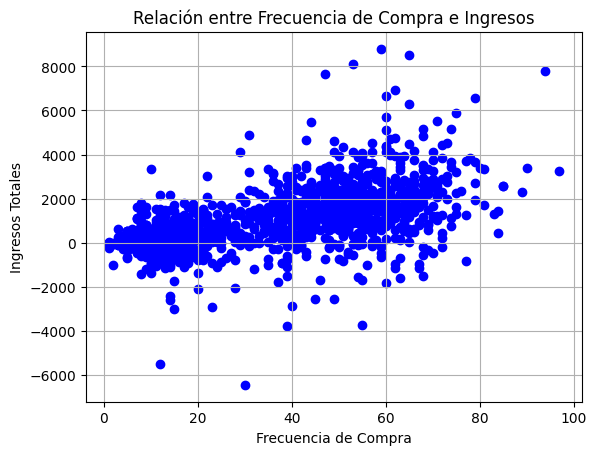

In [25]:
clientes_ingresos = data.groupby("Customer ID")["Profit"].sum().reset_index()
clientes_ingresos.columns = ["CustomerID", "Profit"]
clientes_ingresos = clientes_ingresos.sort_values(by="Profit", ascending=False)

perfil_clientes = pd.merge(frecuencia_compra, clientes_ingresos, on="CustomerID")
print(perfil_clientes.head(10))

# Análisis gráfico
plt.scatter(perfil_clientes["Frequency"], perfil_clientes["Profit"], color="blue")
plt.xlabel("Frecuencia de Compra")
plt.ylabel("Ingresos Totales")
plt.title("Relación entre Frecuencia de Compra e Ingresos")
plt.grid()
plt.show()

In [26]:
perfil_clientes_ordenados = perfil_clientes.sort_values(by='Profit', ascending=False)
print(perfil_clientes_ordenados.head(10))

    CustomerID  Frequency      Profit
215   TC-20980         59  8787.47490
120   RB-19360         65  8523.95150
359   SC-20095         53  8106.21790
1     BE-11335         94  7790.69630
517   HL-15040         47  7657.50178
162   AB-10105         62  6912.61450
199   SP-20920         60  6649.62626
15    HM-14860         79  6544.88640
121   TA-21385         65  6274.98910
23    SE-20110         75  5863.62392


Los clientes que compran con mayor frecuencias. No son los que contribuyen con mayores ingresos. En el gráfico de dispersión se observa que los clientes que compran con una frecuencia entre 40 a 80 son los que contribuyen con mayores ingresos.

3. ¿Son también rentables? ¿Cuál es el margen de beneficio en todos los segmentos?

In [27]:
margen_beneficio = data.groupby('Segment')['Profit'].count().reset_index()
margen_beneficio

,Segment,Profit
0,Consumer,26518
1,Corporate,15429
2,Home Office,9343


In [28]:
print(f"El margen de beneficio entre todos los segmentos es de: {margen_beneficio['Profit'].sum()}")

El margen de beneficio entre todos los segmentos es de: 51290


El segmento de 'Consumer', se puede considerar el más rentable.

4. ¿Qué segmento de clientes es más rentable cada año?

In [29]:
import datetime as dt

data['Order Date'] = pd.to_datetime(data["Order Date"], format='%d-%m-%Y')
data['Ship Date'] = pd.to_datetime(data["Ship Date"], format='%d-%m-%Y')

In [30]:
import datetime as dt
data['Year']  = data['Order Date'].dt.year 

segmento_año = data.groupby(['Segment', 'Year'])['Profit'].sum().reset_index()
segmento_año.columns = ['Segment', 'Year', 'Profit_Year']
print(segmento_año)

        Segment  Year   Profit_Year
0      Consumer  2011  117337.49406
1      Consumer  2012  165799.19094
2      Consumer  2013  208427.73398
3      Consumer  2014  257675.36308
4     Corporate  2011   84746.93574
5     Corporate  2012   90556.69992
6     Corporate  2013  125707.93908
7     Corporate  2014  140196.75392
8   Home Office  2011   46856.38174
9   Home Office  2012   51059.38824
10  Home Office  2013   72799.55712
11  Home Office  2014  106293.85346


In [31]:
for year, group in segmento_año.groupby('Year'):
    print(f"Year: {year}")
    print(group)

Year: 2011
       Segment  Year   Profit_Year
0     Consumer  2011  117337.49406
4    Corporate  2011   84746.93574
8  Home Office  2011   46856.38174
Year: 2012
       Segment  Year   Profit_Year
1     Consumer  2012  165799.19094
5    Corporate  2012   90556.69992
9  Home Office  2012   51059.38824
Year: 2013
        Segment  Year   Profit_Year
2      Consumer  2013  208427.73398
6     Corporate  2013  125707.93908
10  Home Office  2013   72799.55712
Year: 2014
        Segment  Year   Profit_Year
3      Consumer  2014  257675.36308
7     Corporate  2014  140196.75392
11  Home Office  2014  106293.85346


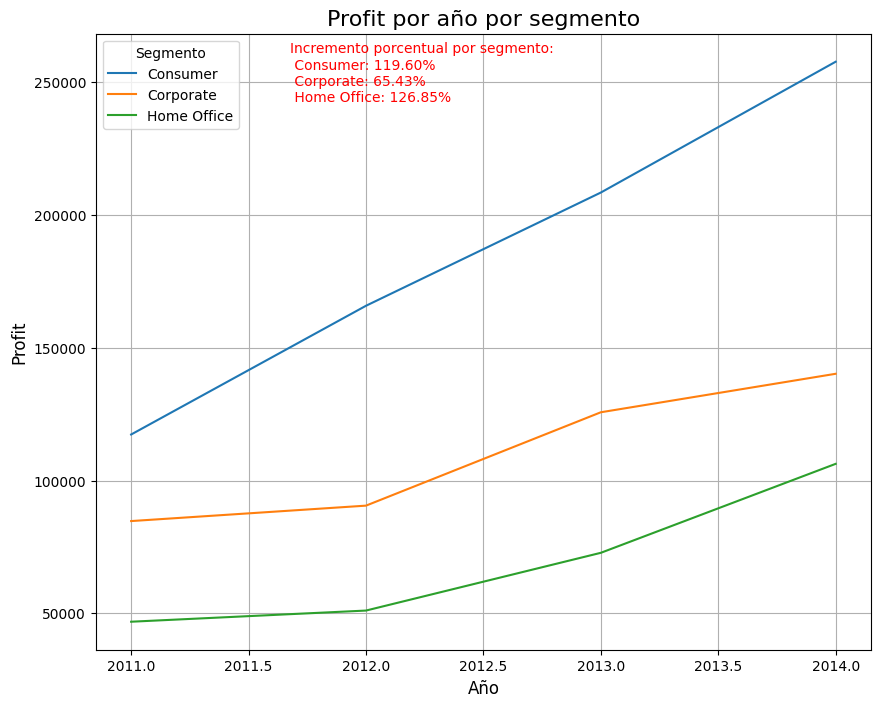

In [32]:
# Calcular el incremento porcentual de ganancia a través de los años
incre_año = []

for segmento in segmento_año['Segment'].unique():
    segmentos = segmento_año[segmento_año["Segment"] == segmento]
    segmentos = segmentos[::3]
    valor_ini = segmentos['Profit_Year'].iloc[0]
    valor_final = segmentos['Profit_Year'].iloc[-1]
    incremento_porcentual = (valor_final - valor_ini) / valor_ini * 100
    incre_año.append((segmento, incremento_porcentual))
    #print(f"El aumento porcentual para {segmento} es de {incremento_porcentual:.2f}%")

# Gráfico del incremento porcentual a través del tiempo
segmento_año = segmento_año.sort_values(by='Year')

plt.figure(figsize=(10, 8))

sns.lineplot(data=segmento_año, x='Year', y='Profit_Year', hue='Segment', markers='o')

plt.title('Profit por año por segmento', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Profit', fontsize=12)
plt.legend(title='Segmento', fontsize=10)
plt.annotate(f"Incremento porcentual por segmento: \n {incre_año[0][0]}: {incre_año[0][1]:.2f}% \n {incre_año[1][0]}: {incre_año[1][1]:.2f}% \n {incre_año[2][0]}: {incre_año[2][1]:.2f}%", 
             xy=(0.25, 0.89), 
             xycoords='axes fraction', 
             fontsize=10,
             color='red')
plt.grid(True)
plt.show()


El segmento con mayor crecimiento acumulado es Home Office con un 126.85%

In [33]:
segmento_año['Pct_change'] = segmento_año.groupby('Segment')['Profit_Year'].pct_change() * 100
segmento_año['Pct_change'] = segmento_año['Pct_change'].round(2)
segmento_año = segmento_año.sort_values(by=["Segment", "Year"]).reset_index(drop=True)
segmento_año

,Segment,Year,Profit_Year,Pct_change
0,Consumer,2011,117337.49406,NaN
1,Consumer,2012,165799.19094,41.30
2,Consumer,2013,208427.73398,25.71
3,Consumer,2014,257675.36308,23.63
4,Corporate,2011,84746.93574,NaN
5,Corporate,2012,90556.69992,6.86
6,Corporate,2013,125707.93908,38.82
7,Corporate,2014,140196.75392,11.53
8,Home Office,2011,46856.38174,NaN
9,Home Office,2012,51059.38824,8.97


In [34]:
mean_incremento = segmento_año.groupby('Segment')['Pct_change'].mean().reset_index()
mean_incremento = mean_incremento.rename(columns={"Pct_change": "Avg_Pct_change"})
mean_incremento.sort_values(by='Avg_Pct_change', ascending=False)

,Segment,Avg_Pct_change
2,Home Office,32.520000
0,Consumer,30.213333
1,Corporate,19.070000


El segmento que tiene un mayor incremento promedio por año es Home Office

5. ¿Cómo se distribuyen los clientes en los países?

In [35]:
clientes_paises = data.groupby('Country')['Customer ID'].count().reset_index()
clientes_paises.columns = ['Country', 'Frecuencia']
clientes_paises = clientes_paises.sort_values(by='Frecuencia', ascending=False)
clientes_paises.head(10)

,Country,Frecuencia
139,United States,9994
6,Australia,2837
44,France,2827
81,Mexico,2644
47,Germany,2065
26,China,1880
138,United Kingdom,1633
17,Brazil,1599
57,India,1555
58,Indonesia,1390


La lista anterior muestra los 10 paises donde se realiza la mayor cantidad de compras.

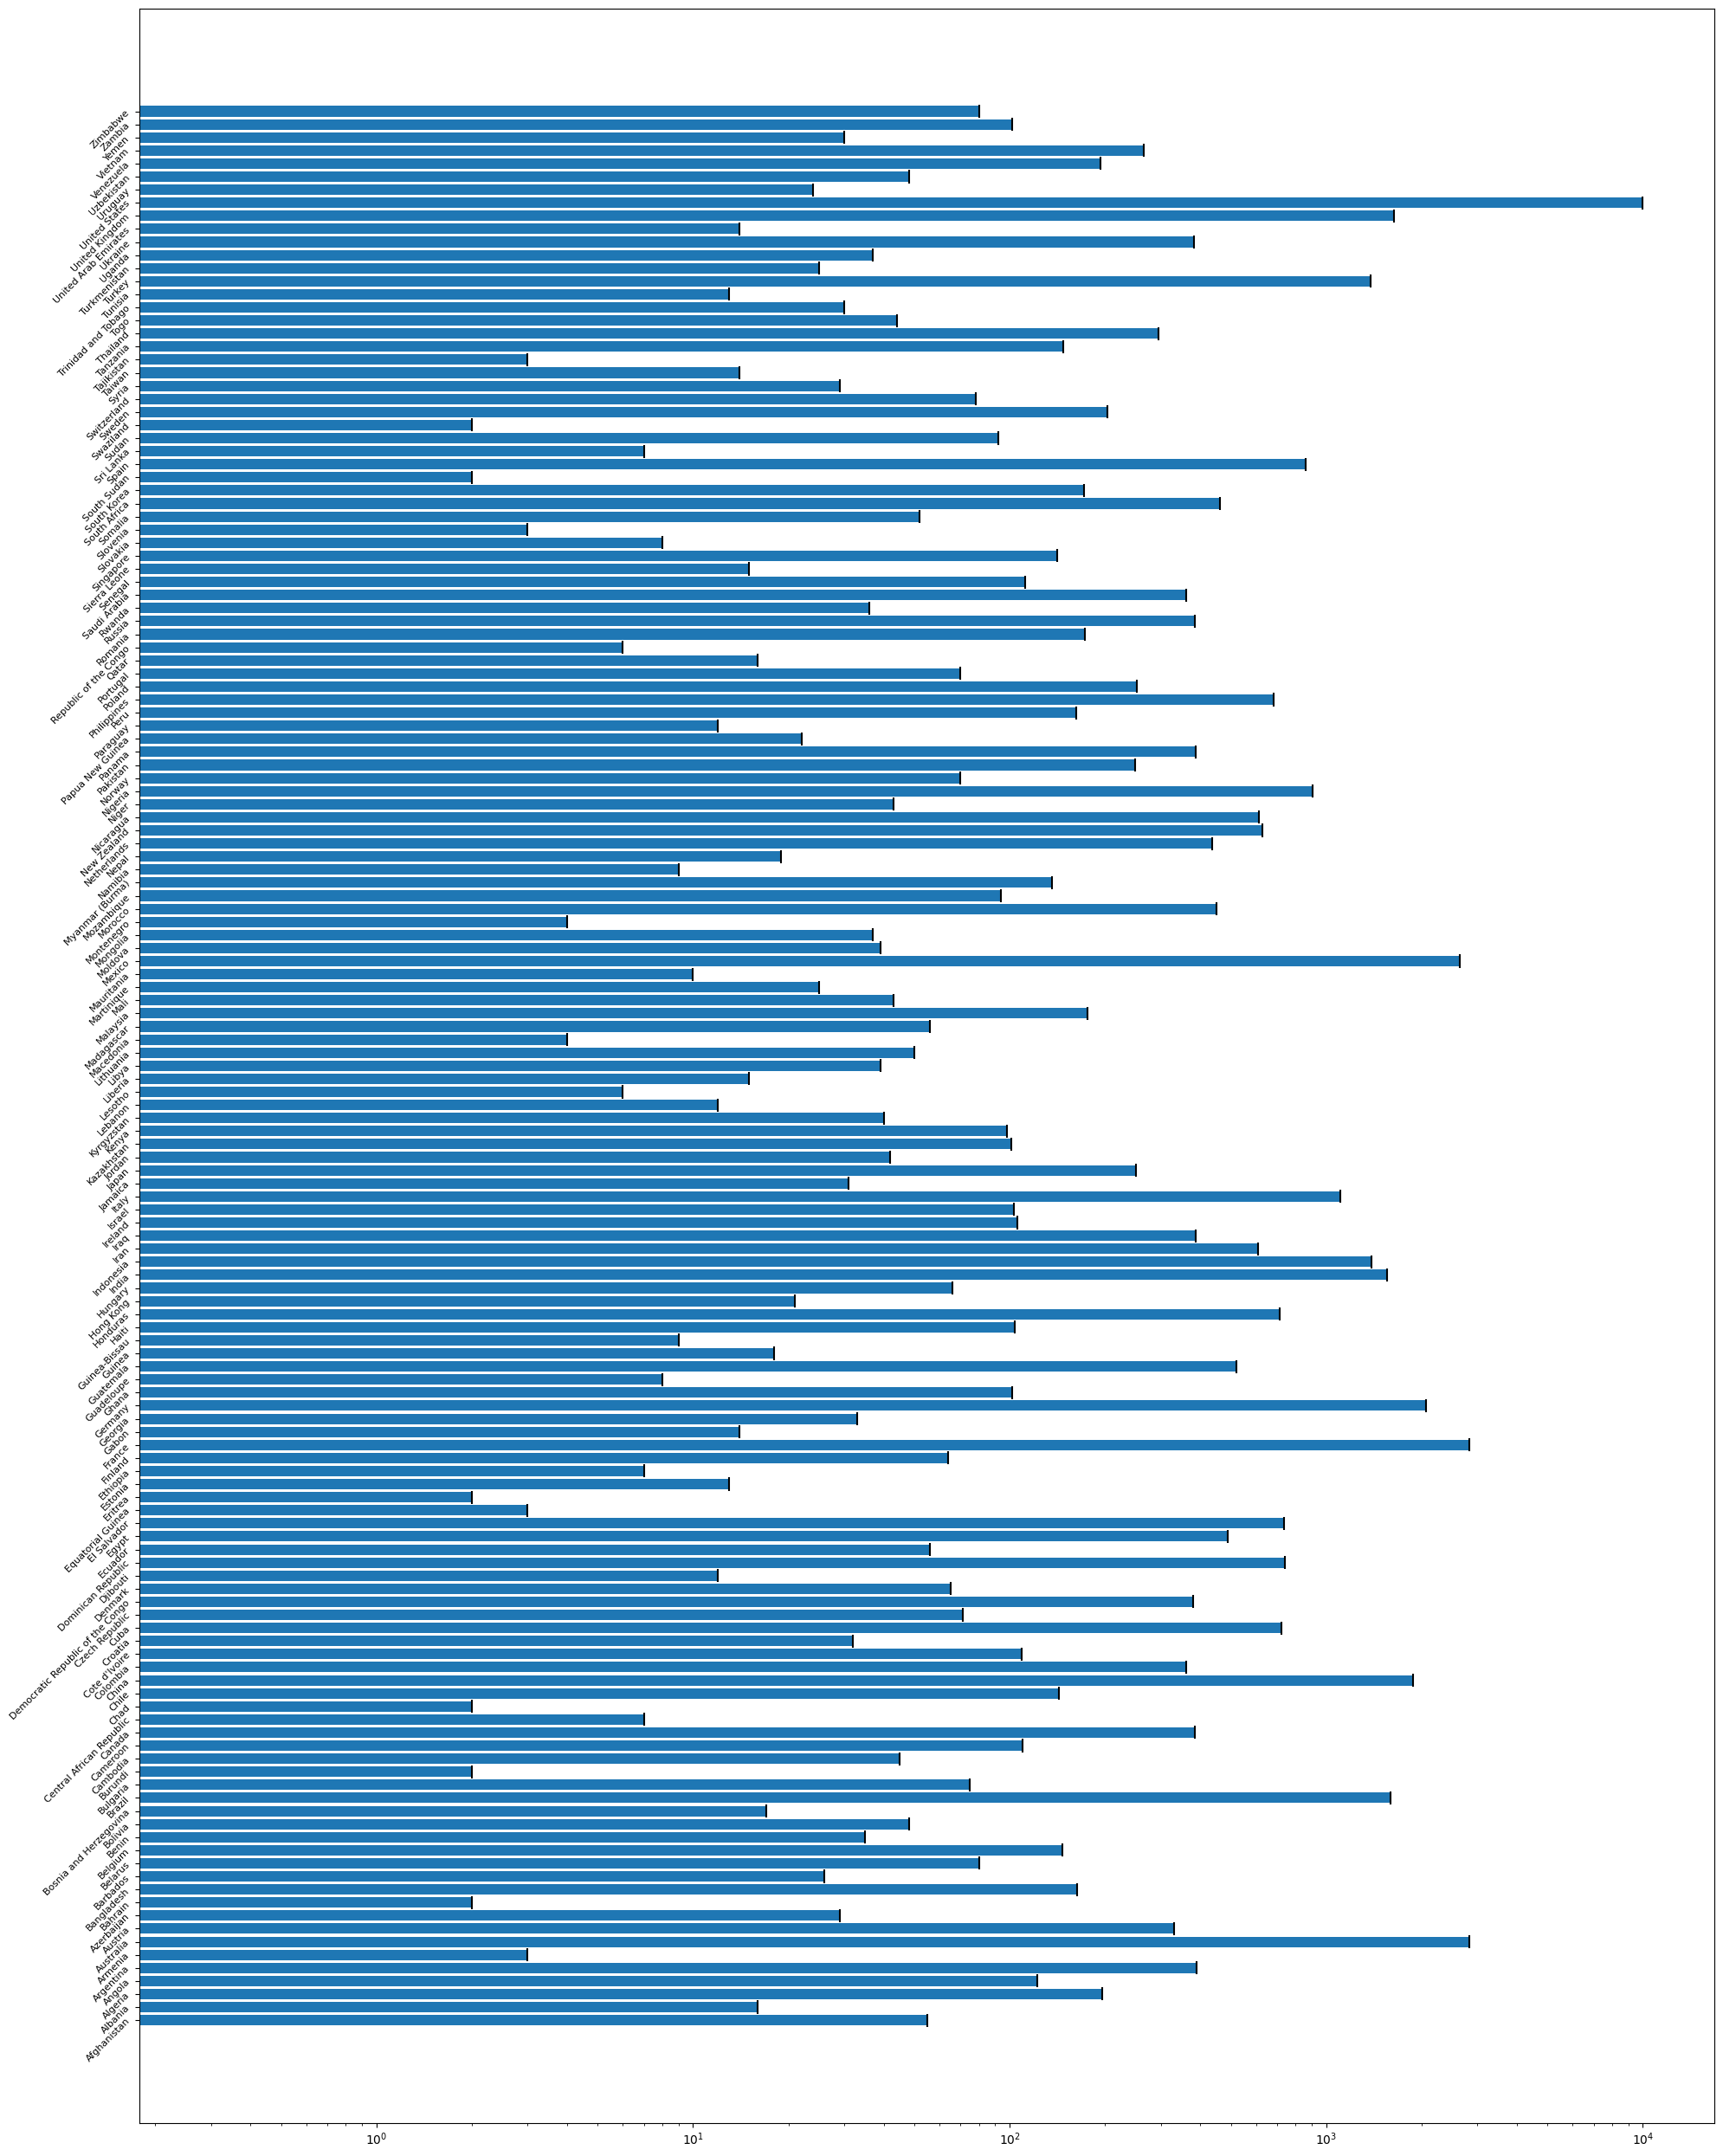

In [36]:
clientes_paises = data.groupby('Country')['Customer ID'].count().reset_index()
clientes_paises.columns = ['Country', 'Frecuencia']
clientes_paises

plt.figure(figsize=(20, 25))
plt.barh(clientes_paises["Country"],
         clientes_paises["Frecuencia"],
         log=True,
         yerr=0.5,
         height=0.8
         )# datos, etiquetas
plt.yticks(rotation=45, fontsize=8)
plt.tight_layout()
plt.show()

# Análisis de producto